In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import training_utils
import pickle
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# pseudo code
# for cluster in clusters
#     scale input features based on training ste
#     load tbnn model
#     predict test set


In [3]:
df = pd.read_csv('/home/ryley/WDK/ML/dataset/komegasst_split.csv')
test_set= ['case_1p2']
val_set = ['case_1p0','fp_2000','fp_3970']
df_train = df[~df['Case'].isin(test_set+val_set)]
df_test = df[df['Case'].isin(test_set)].copy()


df_test[f'pred_b_11'] = np.zeros(len(df_test))
df_test[f'pred_b_12'] = np.zeros(len(df_test))
df_test[f'pred_b_13'] = np.zeros(len(df_test))
df_test[f'pred_b_22'] = np.zeros(len(df_test))
df_test[f'pred_b_23'] = np.zeros(len(df_test))
df_test[f'pred_b_33'] = np.zeros(len(df_test))

df_test[f'pred_b_11_cluster{cluster}'] = np.zeros(len(df_test))
df_test[f'pred_b_12_cluster{cluster}'] = np.zeros(len(df_test))
df_test[f'pred_b_13_cluster{cluster}'] = np.zeros(len(df_test))
df_test[f'pred_b_22_cluster{cluster}'] = np.zeros(len(df_test))
df_test[f'pred_b_23_cluster{cluster}'] = np.zeros(len(df_test))
df_test[f'pred_b_33_cluster{cluster}'] = np.zeros(len(df_test))

for cluster in range(8):
    df_test[f'pred_b_11_cluster{cluster}'] = ""
    df_test[f'pred_b_12_cluster{cluster}'] = ""
    df_test[f'pred_b_13_cluster{cluster}'] = ""
    df_test[f'pred_b_22_cluster{cluster}'] = ""
    df_test[f'pred_b_23_cluster{cluster}'] = ""
    df_test[f'pred_b_33_cluster{cluster}'] = ""
    model_params = pickle.load(open(f"models/params_cluster_{cluster}.pickle", "rb"))
    df_train_i = df_train[df_train['Cluster'] == cluster]
    #df_test_i = df_test[df_test['Cluster'] == cluster].copy()

    tDs = training_utils.bDataset(df_train_i, input_features=model_params['input_features'])
    testDs = training_utils.bDataset(df_test, input_features=model_params['input_features'],scaler = tDs.X_scaler)

    #ind = df_test.index[df_test['Cluster']==cluster].tolist()

    model = training_utils.TBNN(N = 10,
             input_dim = len(model_params['input_features']),
             n_hidden = model_params['n_hidden'],
             neurons = model_params['neurons'],
             activation_function = model_params['activation_function']
            )
    model.load_state_dict(torch.load(f"models/cluster_{cluster}"))
    model.eval()
    for X, T, y in DataLoader(testDs, shuffle=False, batch_size=testDs.__len__()):
        y_pred_test, g_pred = model(X, T)
        print(f"loss: {training_utils.bLoss(y_pred_test,y)}")
        #val_loss_values.append(loss_fn(y_pred_val,y).item())   
        #mse_v = mseLoss(y_pred_val,y).item()  
        #rl_v = realizLoss(y_pred_val,y).item()
    #for prediction_name in ['pred_b_11','pred_b_12','pred_b_13','pred_b_22','pred_b_23','pred_b_33']:
    print(y_pred_test.shape)
    df_test[f'pred_b_11_cluster{cluster}'] = y_pred_test.detach().numpy()[:,0,0]
    df_test[f'pred_b_12_cluster{cluster}'] = y_pred_test.detach().numpy()[:,0,1]
    df_test[f'pred_b_13_cluster{cluster}'] = y_pred_test.detach().numpy()[:,0,2]
    df_test[f'pred_b_22_cluster{cluster}'] = y_pred_test.detach().numpy()[:,1,1]
    df_test[f'pred_b_23_cluster{cluster}'] = y_pred_test.detach().numpy()[:,1,2]
    df_test[f'pred_b_33_cluster{cluster}'] = y_pred_test.detach().numpy()[:,2,2]

    #df_test[ind] = model.pre
    
for field in ['pred_b_11','pred_b_12','pred_b_13','pred_b_22','pred_b_23','pred_b_33']:
    for cluster in range(8):
        df_test[field] +=  df_test[f'{field}_cluster{cluster}']*df_test[f'Probability_cluster_{cluster}']


NameError: name 'cluster' is not defined

In [6]:
df = pd.read_csv('/home/ryley/WDK/ML/dataset/komegasst_split.csv')
test_set= ['case_1p2']
val_set = ['case_1p0','fp_2000','fp_3970']
df_train = df[~df['Case'].isin(test_set+val_set)]
df_test = df[df['Case'].isin(test_set)].copy()


df_test[f'pred_b_11_all'] = np.zeros(len(df_test))
df_test[f'pred_b_12_all'] = np.zeros(len(df_test))
df_test[f'pred_b_13_all'] = np.zeros(len(df_test))
df_test[f'pred_b_22_all'] = np.zeros(len(df_test))
df_test[f'pred_b_23_all'] = np.zeros(len(df_test))
df_test[f'pred_b_33_all'] = np.zeros(len(df_test))


model_params = pickle.load(open(f"models/params_cluster_all.pickle", "rb"))
#df_train_i = df_train[df_train['Cluster'] == cluster]
#df_test_i = df_test[df_test['Cluster'] == cluster].copy()

tDs = training_utils.bDataset(df_train, input_features=model_params['input_features'])
testDs = training_utils.bDataset(df_test, input_features=model_params['input_features'],scaler = tDs.X_scaler)

#ind = df_test.index[df_test['Cluster']==cluster].tolist()

model = training_utils.TBNN(N = 10,
         input_dim = len(model_params['input_features']),
         n_hidden = model_params['n_hidden'],
         neurons = model_params['neurons'],
         activation_function = model_params['activation_function']
        )
model.load_state_dict(torch.load(f"models/cluster_all"))
model.eval()
for X, T, y in DataLoader(testDs, shuffle=False, batch_size=testDs.__len__()):
    y_pred_test, g_pred = model(X, T)
    print(f"loss: {training_utils.bLoss(y_pred_test,y)}")
    #val_loss_values.append(loss_fn(y_pred_val,y).item())   
    #mse_v = mseLoss(y_pred_val,y).item()  
    #rl_v = realizLoss(y_pred_val,y).item()
#for prediction_name in ['pred_b_11','pred_b_12','pred_b_13','pred_b_22','pred_b_23','pred_b_33']:
print(y_pred_test.shape)
df_test[f'pred_b_11_all'] = y_pred_test.detach().numpy()[:,0,0]
df_test[f'pred_b_12_all'] = y_pred_test.detach().numpy()[:,0,1]
df_test[f'pred_b_13_all'] = y_pred_test.detach().numpy()[:,0,2]
df_test[f'pred_b_22_all'] = y_pred_test.detach().numpy()[:,1,1]
df_test[f'pred_b_23_all'] = y_pred_test.detach().numpy()[:,1,2]
df_test[f'pred_b_33_all'] = y_pred_test.detach().numpy()[:,2,2]



loss: 0.06357140094041824
torch.Size([14751, 3, 3])


Index(['Unnamed: 0.1', 'Unnamed: 0', 'komegasst_skewness', 'komegasst_I1_1',
       'komegasst_I1_2', 'komegasst_I1_3', 'komegasst_I1_4', 'komegasst_I1_5',
       'komegasst_I1_6', 'komegasst_I1_7',
       ...
       'Probability_cluster_4', 'Probability_cluster_5',
       'Probability_cluster_6', 'Probability_cluster_7', 'pred_b_11_all',
       'pred_b_12_all', 'pred_b_13_all', 'pred_b_22_all', 'pred_b_23_all',
       'pred_b_33_all'],
      dtype='object', length=244)


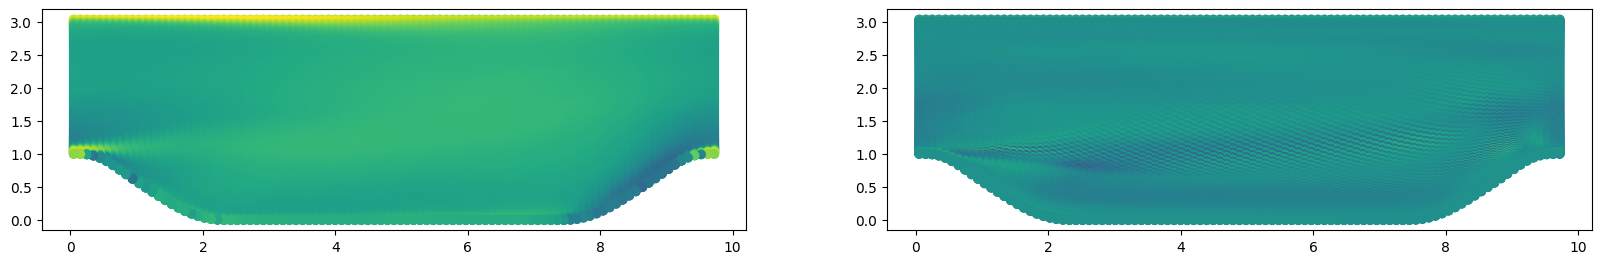

In [7]:
test_df_phll = df_test[df_test['Case'] == 'case_1p2']
print(test_df_phll.columns)
fig, ax = plt.subplots(1,2,figsize=(20,60))
ax[0].scatter(test_df_phll['komegasst_C_1'],test_df_phll['komegasst_C_2'],c=test_df_phll['DNS_b_11'],vmin = -.5, vmax = .5)
ax[1].scatter(test_df_phll['komegasst_C_1'],test_df_phll['komegasst_C_2'],c = test_df_phll['pred_b_11_all'],vmin = -.5, vmax = .5)
for axi in ax:
    axi.set_aspect(1)

In [35]:
print(df_test['pred_b_11'])

886           0.0
887       0.00001
888      0.000087
889      0.000395
890      0.001258
           ...   
60396   -0.000116
60397    -0.00001
60398    0.000313
60399     0.00054
60400    0.000397
Name: pred_b_11, Length: 14919, dtype: object
